In [1]:
!pip install sklearn

  Using cached scipy-1.4.1-cp38-cp38-win_amd64.whl (31.0 MB)
Could not build wheels for sklearn, since package 'wheel' is not installed.
Could not build wheels for numpy, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

oryginał
przerobione


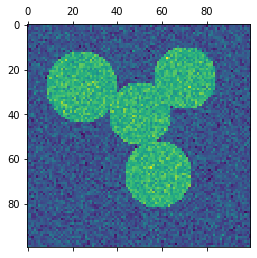

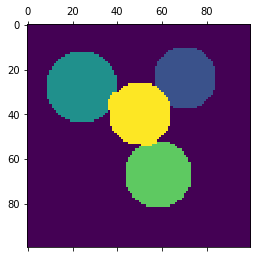

In [3]:
#dokonamy klasteryzacji danych na podstawie obrazu składającego sie z czterech kół

l = 100
x, y = np.indices((l, l))  #rozmiar okna

#srodki kol
center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

#promienie
radius1, radius2, radius3, radius4 = 16, 14, 15, 14

#rownania kol
circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2


#nanoszenie na wykres
img = circle1 + circle2 + circle3 + circle4

# musimy utworzyc maske, inaczej nie odrozniamy obiektow od siebie, tylko obiekty od tla
mask = img.astype(bool)


img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

#konwertowanie to grafu z wartosciami gradientu na rogach
graph = image.img_to_graph(img, mask=mask)

# malejaca funkcja gradientu
graph.data = np.exp(-graph.data / graph.data.std())

#oznakowania
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = np.full(mask.shape, -1.)
label_im[mask] = labels
print('oryginał')
plt.matshow(img)
print('przerobione')
plt.matshow(label_im)


plt.show()

In [6]:
%store img
%store label_im

Stored 'img' (ndarray)
Stored 'label_im' (ndarray)
